A small tutorial for FAdo
=========================

FAdo system is a set  tools for regular languages manipulation.

Regular languages can be represented by regular expressions (regexp) or finite automata, among other formalisms. Finite automata may be deterministic (DFA) or non-deterministic (NFA). In FAdo these representations are implemented as Python classes. A full documentation of all classes and methods is here.

To work with FAdo, after installation, import the following modules on a Python interpreter:

In [1]:
from FAdo.fa import *
from FAdo.reex import *
from FAdo.fio import *

The module fa implements the classes for finite automata and the module reex the classes for regular expressions. The module fio implements methods for IO of automata and related models.

General conventions
-------------------

Methods which name ends in P test if the object verifies a given property and return True or False.

Finite Automata
---------------

The top class for finite automata is the class FA,which has two main subclasses: OFA for one way finite automata and the class TFA for two-way finite automata.
The class OFA implements the basic structure of a finite automaton shared by DFAs and NFAs. This class defines the following attributes:

 ``Sigma``: the input alphabet (set)

 ``States``: the list of states.  It is a list such that each state is referred by its index whenever it is used (transitions, Final, etc).

 ``Initial``: the initial state (or a set of initial states for NFA).  It is an index or list of indexes.

 ``Final``: the set of final states. It is a list of indexes.

In general, one should not create instances (objects) of class OFA. The class DFA and NFA implement DFAs and NFAs, respectively.  The class GFA implements generalized NFAs that are used in the conversion between finite automata and regular expressions. All three classes inherit from class OFA.

For each class there are special methods for add/delete/modify alphabet symbols, states and transitions.

DFAs
----

The following example shows how to build a DFA that accepts the words of {0,1}* that are multiples of 3.

In [2]:
m3 = DFA()
m3.setSigma(['0','1'])
m3.addState('s1')
m3.addState('s2')
m3.addState('s3')
m3.setInitial(0)
m3.addFinal(0)
m3.addTransition(0, '0', 0)
m3.addTransition(0, '1', 1)
m3.addTransition(1, '0', 2)
m3.addTransition(1, '1', 0)
m3.addTransition(2, '0', 1)
m3.addTransition(2, '1', 2)

It is now possible, for instance, to see the structure of the automaton or to test if a word is accepted by it.

In [3]:
m3


DFA((['s1', 's2', 's3'], ['1', '0'], 's1', ['s1'], "[('s1', '0', 's1'), ('s1', '1', 's2'), ('s2', '0', 's3'), ('s2', '1', 's1'), ('s3', '0', 's2'), ('s3', '1', 's3')]"))

In [4]:
m3.evalWordP("011")

True

In [5]:
m3.evalWordP("1011")

False

If graphviz is installed it is also possible to display the diagram of an automaton
as follows:

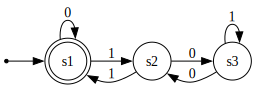

In [6]:
m3.display()

Instead of constructing the DFA directly we can load (and save) it in a simple text format. For the previous automaton the description will be:

| @DFA 0
| 0 1 1
| 0 0 0
| 1 1 0
| 1 0 2
| 2 1 2
| 2 0 1

Then, if this description is saved in file ``mul3.fa``, we have

In [8]:
a = "@DFA 0 \n 0 1 1 \n 0 0 0 \n 1 1 0 \n 1 0 2 \n 2 1 2 \n 2 0 1\n"
with open("mul3.fa",'w') as f: f.write(a)

In [ ]:
m3 = readFromFile('mul3.fa')

As the set of states is represented by a Python list , the list method len can be used to determine the number of states of a FA:

In [7]:
len(m3.States)

3

For the number of Transitions the countTransitions() method must be used

In [8]:
m3.countTransitions()

6

Automata can be displayed

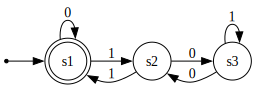

In [ ]:
m3.display()

To minimize a DFA any of the minimization algorithms implemented can be used:

In [11]:
min = m3.minimalHopcroft()
min

DFA((['s1', 's2', 's3'], ['1', '0'], 's1', ['s1'], "[('s1', '0', 's1'), ('s1', '1', 's2'), ('s2', '0', 's3'), ('s2', '1', 's1'), ('s3', '0', 's2'), ('s3', '1', 's3')]"))

In this case, the `DFA`` was already minimal so min has the same number of states as ``m3``.

Several (regularity preserving) operations of DFAs are implemented in FAdo:  boolean (union (| or __or__), intersection (& or __and__) and complementation (~ or __invert__)),  concatenation (concat), reversal  (reversal) and star (star).

In [12]:
u = m3 | ~m3
u

DFA((['0', '5', '10'], ['1', '0'], '0', ['0', '5', '10'], "[('0', '1', '5'), ('0', '0', '0'), ('5', '1', '0'), ('5', '0', '10'), ('10', '1', '10'), ('10', '0', '5')]"))

In [13]:
m = u.minimal()
m

DFA((['0'], ['1', '0'], '0', ['0'], "[('0', '1', '0'), ('0', '0', '0')]"))

State names can be renamed in-place using:

In [14]:
m.renameStates(range(len(m)))

DFA((['0'], ['1', '0'], '0', ['0'], "[(0, '1', 0), (0, '0', 0)]"))

Notice that ``m`` recognize all words over the alphabet ``{0,1}``. It is possible to generate a word recognisable by an automata (``witness``)

In [15]:
u.witness()

'@epsilon'

In this case this allows to ensure that u recognizes the empty word.

This method is also useful for obtain a witness for the difference of two DFAs (witnessDiff).

To test if two DFAs  are equivalent the the operator == (equivalenceP) can be used.

NFAs
----

NFAs can be built and manipulated in a  similar way.  There is no distinction between NFAs with and without epsilon-transitions. But it is possible to test if a NFA has epsilon-transitions and convert between a NFA with epsilon-transitions to a (equivalent) NFA without them.

Converting between NFAs and DFAs
--------------------------------

The method toDFA allows to convert a NFA to an equivalent DFA by the subset construction method. The method toNFA  migrates trivially a DFA to a NFA.

Regular Expressions
-------------------

A regular expression can be a symbol of the alphabet, the empty set (@epmtyset), the empty word (@epsilon) or the concatenation or the union (+) or the Kleene star (*) of a regular expression. Examples of regular expressions are a+b, (a+ba)*, and (@epsilon+ a)(ba+ab+@emptyset).


The class regexp is the base class for regular expressions and is used to represent an alphabet symbol.  The classes epsilon and emptyset are the subclasses used for the empty set and empty word, respectively. Complex regular expressions are concat,  disj, and star.


As for DFAs (and NFAs) we can build directly a regular expressions as a Python class:

In [16]:
r = CStar(CDisj(CAtom("a"), CConcat(CAtom("b"), CAtom("a"))))
print(r)

(a + (b a))*


But we can convert a string to a regexp class or subclass, using the method str2regexp.

In [17]:
r = str2regexp("(a+ba)*")
print(r)

(a + (b a))*


For regular expressions there are several measures available: alphabetic size, (parse) tree size, string length, number of epsilons and star height. It is also possible to explicitly associate an alphabet to regular expression (even if some symbols do not appear in it) (``setSigma``)

There are several algebraic properties that can be used to obtain equivalent regular expressions of a smaller size. The method reduced transforms a regular expression into one equivalent without some obvious unnecessary epsilons, emptysets or stars.

Several methods that allows the manipulation of derivatives  (or partial derivatives) by a symbol or by a word are implemented. However, the basic class RegExp does not deal with regular expressions module ACI properties (associativity, commutativity and idempotence of the union) , a so it is not possible to obtain all  word derivatives of a given regular expression. This is not the case for partial derivatives.

To test if two regular expressions are equivalent the method compare can be used.

In [18]:
r.compare(str2regexp("(a*(ba)*a*)*"))

True

There several methods to convert regular expressions into equivalent nfas or dfas: Thompson, Position/Glushkov, Partial Derivatives (PD), etc.

In [19]:
r.nfaThompson()

NFA((["(0, (0, '0'))", "(0, (0, '1'))", '(0, (1, 0))', '(0, (1, 1))', '(1, 0)', '(1, 1)', '(1, 2)', '(1, 3)', '8', '9'], ['a', 'b'], ['8'], ['9'], "[((0, (1, 0)), 'a', (0, (1, 1))), ((0, (0, '0')), '@epsilon', (0, (1, 0))), ((0, (0, '0')), '@epsilon', (1, 0)), ((0, (1, 1)), '@epsilon', (0, (0, '1'))), ((1, 0), 'b', (1, 1)), ((1, 2), 'a', (1, 3)), ((1, 1), '@epsilon', (1, 2)), ((1, 3), '@epsilon', (0, (0, '1'))), ('8', '@epsilon', (0, (0, '0'))), ('8', '@epsilon', '9'), ('9', '@epsilon', '8'), ((0, (0, '1')), '@epsilon', '9')]"))

In [20]:
r.nfaPosition()

NFA((['Initial', "('a', 1)", "('b', 2)", "('a', 3)"], ['a', 'b'], ['Initial'], ['Initial', "('a', 1)", "('a', 3)"], '[(\'Initial\', \'a\', "(\'a\', 1)"), (\'Initial\', \'b\', "(\'b\', 2)"), ("(\'b\', 2)", \'a\', "(\'a\', 3)"), ("(\'a\', 3)", \'b\', "(\'b\', 2)"), ("(\'a\', 3)", \'a\', "(\'a\', 1)"), ("(\'a\', 1)", \'a\', "(\'a\', 1)"), ("(\'a\', 1)", \'b\', "(\'b\', 2)")]'))

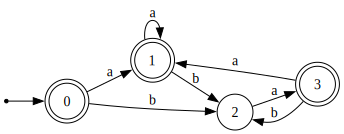

In [21]:
r.nfaPosition().display()

In [22]:
r.nfaPD()


NFA((['6', '7'], ['a', 'b'], ['6'], ['6'], "[(6, 'a', 6), (6, 'b', 7), (7, 'a', 6)]"))

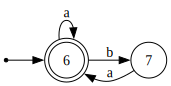

In [23]:
r.nfaPD().display()




Converting Finite Automata to Regular Expressions
-------------------------------------------------

Import module conversions

In [26]:
from FAdo.conversions import *

For pedagogical purposes, it is implemented a recursive method that constructs a regular expression equivalent to a given DFA (DFA2regexpDijkstra).

In [ ]:
print(DFA2regexpDijkstra(m3))

((0 + ((@epsilon + 0) (0* (@epsilon + 0)))) + ((1 + ((@epsilon + 0) (0* 1))) ((1 (0* 1))* (1 + (1 (0* (@epsilon + 0))))))) + (((1 + ((@epsilon + 0) (0* 1))) ((1 (0* 1))* 0)) ((1 + (0 ((1 (0* 1))* 0)))* (0 ((1 (0* 1))* (1 + (1 (0* (@epsilon + 0))))))))


Methods based on state elimination techniques are usually more efficient, and produces much smaller regular expressions. We have implemented several heuristics for the elimination order.

In [ ]:
print(FA2regexpCG(m3))

((0 + (1 1)) + (((1 0) (1 + (0 0))*) (0 1)))*


NFA((['', '', '', '', '0', '1', '2', '3', '8', '9'], 
['a', 'b'], ['8'], ['9'], 
"[('', '@epsilon', ''), ('', '@epsilon', 0), ('', '@epsilon', '9'), ('', 'a', ''),
 ('', '@epsilon', ''), (0, 'b', 1), (1, '@epsilon', 2), (2, 'a', 3),
 (3, '@epsilon', ''), ('8', '@epsilon', ''), ('8', '@epsilon', '9'), ('9', '@epsilon', '8')]"))

General Example
---------------

Considering the several methods described before it is possible to convert between the different equivalent representations of regular languages, as well to perform several regularity preserving operations.

In [ ]:
r.nfaPosition().toDFA().minimal(complete=False)

DFA((['0', '2'], ['a', 'b'], '0', ['0'], "[('0', 'a', '0'), ('0', 'b', '2'), ('2', 'a', '0')]"))

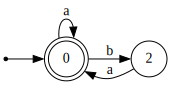

In [ ]:
r.nfaPosition().toDFA().minimal(complete=False).display()

In [ ]:
m3 == FA2regexpCG(m3).nfaPD().toDFA().minimal()

True

More classes and modules
------------------------

Several other classes and modules are also available, including:

class ``ICDFArnd`` (module ``rndfa.py``): Random DFA generation

class ``FL`` (module ``fl.py``): special methods for finite languages

module ``comboperations.py``:  implementation of several algorithms for several combined operations with DFAs and NFAs

module ``transducers.py``: several classes and methods for transducers in standard form
 
module ``codes.py``:  language  tests for a property  (set of languages) specified by a transducer